# Исследование данных о российском кинопрокате



Заказчик исследования — Министерство культуры Российской Федерации. 

Предстоит работа с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Цель исследования:** 

 1. Изучить рынок российского кинопроката и выявить текущие тренды.
 2. Выяснить, насколько фильмы, получившие государственную поддержку интересны зрителю.


**Ход исследования:**

 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Исследование фильмов, получивших государственную поддержку.
 5. Общий вывод.

 **Описание данных**:

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

`title` — название фильма;

`puNumber` — номер прокатного удостоверения;

`show_start_date` — дата премьеры фильма;

`type` — тип фильма;

`film_studio` — студия-производитель;

`production_country` — страна-производитель;

`director` — режиссёр;

`producer` — продюсер;

`age_restriction` — возрастная категория;

`refundable_support` — объём возвратных средств государственной поддержки;

`nonrefundable_support` — объём невозвратных средств государственной поддержки;

`financing_source` — источник государственного финансирования;

`budget` — общий бюджет фильма;

`ratings` — рейтинг фильма на КиноПоиске;

`genres` — жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

`puNumber` — номер прокатного удостоверения;

`box_office` — сборы в рублях.
        

### 1. Обзор данных.

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 



In [1]:
#Импортируем библиотеку pandas
#Импортируем библиотеку matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Прочитаем файл mkrf_movies.csv и сохраним его в переменную data

In [4]:
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv') 
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [5]:
#Получим общую информацию о датафрейме, выведем первые 10 строк датафрейма

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


Вывод: в таблице 7486 строк и 15 столбцов. Некоторые столбцы содержат пропуски. В названии столбца `puNumber` нарушено правило snake_case, кроме этого, указанный столбец имеет тип `object.`

In [8]:
#Прочитаем файл mkrf_shows.csv и сохраним его в переменную data_shows

In [9]:
try:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv') 
except:
    data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [10]:
#Получим общую информацию о датафрейме data_shows, выведем первые 10 строк датафрейма

In [11]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [12]:
data_shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


Вывод: в датафрейме data_shows 3158 строк и 2 столбца отсутствуют пропуски. Присоединим к таблице `data` таблицу `data_shows` методом `.merge` по общему столбцу `puNumber`, но перед этим в таблице `data` в столбце `puNumber` приведем значения к типу данных `int`. 

In [13]:
#в столбце puNumber оказалась одна строчка со строковым значением 'нет', удалим ее.

In [14]:
data.loc[data['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data = data.drop(labels= [1797], axis=0).reset_index(drop=True)

In [16]:
#в таблице data приведем столбец puNumber к типу данных int

In [17]:
data['puNumber'] = data['puNumber'].astype('int')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [19]:
#Присоединим к таблице data таблицу data_shows, применим метод merge

In [20]:
data = data.merge(data_shows, on='puNumber', how='left')

In [21]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
puNumber,7485.0,1.351966e+08,3.835292e+07,1811096.0,112025118.0,1.210155e+08,1.240033e+08,2.310011e+08
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.000000e+00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,3.000000e+07,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,6.864992e+07,1.419853e+08,2.305074e+09
box_office,3158.0,7.647870e+07,2.403531e+08,0.0,86239.0,2.327988e+06,2.397967e+07,3.073569e+09


In [23]:
#Приведем название столбца puNumber к snake_case и проверим произведенные изменения

In [24]:
data = data.rename(columns = {'puNumber': 'pu_number'})

In [25]:
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** В ходе ознакомления с данными установлено, что в таблице data содержится 7486 строк и 15 столбцов. Некоторые столбцы содержат пропуски, которые будут в дальнейшем обработаны. Название столбца `puNumber` приведено к общепринятому стилю snake_case, тип данных в указанном столбце изменен на `int`. К таблице `data` была присоединена таблица `data.show` по столбцу `puNumber`, содержащего номер прокатного удостоверения. В столбце `budget` медиана и среднее значительно отличается, вероятно, присутствуют выбросы.

### 2. Предобработка данных

#### 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [27]:
#Приведем тип данных столбца show_start_date к datetime

In [28]:
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'], format='%Y.%m.%dT%H:%M:%S'

).dt.tz_localize(None)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [30]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [31]:
# Приведем значения столбца ratings к типу данных float, перед этим посмотрим на уникальные значения столбца

In [32]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [33]:
#в столбце присутствуют опечатки, исправим некорректные значения
#Заменим '%' на пустую строку и проверим изменения

In [34]:
data['ratings'] = data['ratings'].str.replace('%','')

In [35]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '28',
       '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8',
       '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7',
       '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '6.7', '6.8', '6.9', '62', '64', '7.0', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79', '8.0', '8.1',
       '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '83', '88',
       '89', '9.0', '9.1', '9.2', '90', '91', '94', '97', '98', '99', nan],
      dtype=object)

In [36]:
#приведем значения к типу данных float

In [37]:
data['ratings'] = data['ratings'].astype('float')

In [38]:
#Значения рейтинга выше 10 примем за опечатки и разделим значения рейтинго выше 10 на 10.

In [39]:
for elem in data.loc[data['ratings'] > 10, 'ratings'].unique():
    data.loc[data['ratings'] == elem, 'ratings'] = elem/10

In [40]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

**Вывод:**
Тип данных столбца `show_start_date` к приведен к типу данных `datetime`. В столбце `ratings` исправлены опечатки, тип данных приведен к `float`. 


#### 2.2. Пропуски


In [41]:
#Посчитаем количество пропусков в датафрейме

In [42]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [43]:
#Посчитаем количество пропусков в процентном соотношении

In [44]:
(data.isna().sum()/len(data)).round(4)*100

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.24
production_country        0.03
director                  0.12
producer                  7.59
age_restriction           0.00
refundable_support       95.56
nonrefundable_support    95.56
budget                   95.56
financing_source         95.56
ratings                  12.91
genres                   13.03
box_office               57.81
dtype: float64

В столбцах `film_studio`, `production_country`, `director` общий процент пропусков составляет 0.39%, такие строки подлежат удалению, поскольку их отсутствие не исказит общий результат исследования.

In [45]:
#Удалим строки в столбцах film_studio, production_country, director, 
#сбросим индексы строк и проверим выполненные изменения

In [46]:
data.shape[0]

7485

In [47]:
data = data.dropna(subset=['film_studio', 'production_country', 'director']).reset_index(drop=True)

In [48]:
data['film_studio'].isna().sum()

0

In [49]:
data['production_country'].isna().sum()

0

In [50]:
data['director'].isna().sum()

0

In [51]:
data.shape[0]

7458

В столбце `producer` 7.59% пропущенных значений. Данный столбец не будет задействован в дальнейшем исследовании, заполним пропуски значением 'unknown'.

In [52]:
#Заполним пропуски в столбце producer и проверим выполненные изменения

In [53]:
data['producer'] = data['producer'].fillna('unknown')

In [54]:
data['producer'].isna().sum()

0

В столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` одинаковое количество пропусков: 7153, что составляет 95.56% от всего датафрейма. Вероятно, пропуски в одних и тех же строках. Проверим это.

In [55]:
len(data.loc[(data['refundable_support'].isna())&(data['nonrefundable_support'].isna())&\
         (data['budget'].isna())&(data['financing_source']).isna()])


7126

99.6% пропусков содержатся в одних и тех же строках.

refundable_support — объём возвратных средств государственной поддержки;

nonrefundable_support — объём невозвратных средств государственной поддержки;

financing_source — источник государственного финансирования;

budget — общий бюджет фильма;

Поскольку столбец `budget` включает в себя полный объём государственной поддержки и данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку, то пропуски в этих столбцах могут означать отсутствие государственной поддержки для соответствующих фильмов, поэтому оставим пропуски без изменений.

В столбце `ratings` обнаружено 966 пропусков, что составляет 12.91% от всех данных датасета, а в столбце `genres` обнаружено 975 пропусков, что составляет 13% от всех данных датасета, проверим, в одних и тех же ли строчках содержатся пропуски.

In [56]:
len(data.loc[(data['ratings'].isna())&(data['genres'].isna())])

947

Более 97% пропусков столбцов `ratings` и `genres` в одих и тех же строках. 

Рейтинг кинофильмов на сайте Кинопоиск отображается только в случае, если есть достаточное количество честных («ненакрученных») оценок. Отсутствие рейтинга может означать недостаточное количество оценок, и неопределенный рейтинг на момент формирования датасета, поэтому логичнее оставить пропуски в столбце `ratings` без изменений.

Особенностью сайта Кинопоиск является то, что редактировать информацию в базе данных может любой пользователь интернета, поэтому наличие пропусков в столбце `genres` может означать человеческий фактор заполнения ячейки с жанром. Заполним пропуски значением 'прочие'

In [57]:
data['genres'] = data['genres'].fillna('прочие')

In [58]:
data['genres'].isna().sum()

0

В столбце `box_office` содержатся данные о сборах в рублях. Количество пропусков составляет 57.81% от общего объема данных, и пропуски появились в результате соединения двух таблиц. Отсутствующие значения означают, что для соответствующего фильма данных о сборах в рублях нет. Оставим эти пропуски без заполнения.

**Вывод:** Изучены и обработаны пропуски в столбцах таблицы: `film_studio`, `production_country`, `director`, `producer`, `refundable_support`, `nonrefundable_support`, `financing_source`, `genres`, `budget`, `ratings`.


В столбцах `film_studio`, `production_country`, `director` общий процент пропусков составил 0.39%, такие строки удалены, поскольку их отсутствие не исказит общий результат исследования.

В столбце `producer` 7.59% пропущенных значений, этот столбец не будет задействован в дальнейшем исследовании, поэтому пропуски заполнены значением 'unknown'.

В столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` одинаковое количество пропусков: 7153, что составляет 95.56% от всего датафрейма, и 99.6% пропусков содержатся в одних и тех же строках. Поскольку столбец `budget` включает в себя полный объём государственной поддержки и данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку, то пропуски в этих столбцах могут означать отсутствие государственной поддержки для соответствующих фильмов, поэтому пропуски оставлены без изменений.



В столбце `ratings` обнаружено 966 пропусков, что составляет 12.91% от всех данных датасета, а в столбце `genres` обнаружено 975 пропусков, что составляет 13% от всех данных датасета, и более 97% пропусков столбцов `ratings` и `genres` в одих и тех же строках. Рейтинг кинофильмов на сайте Кинопоиск отображается только в случае, если есть достаточное количество честных («ненакрученных») оценок. Отсутствие рейтинга может означать недостаточное количество оценок, и неопределенный рейтинг на момент формирования датасета, поэтому пропуски оставлены без изменений. Пропуски в столбце `genres` заполнены значением 'прочие'.



В столбце `box_office` содержатся данные о сборах в рублях. Количество пропусков составляет 57.81% от общего объема данных, и пропуски появились в результате соединения двух таблиц. Пропуски означают, что для соответствующего фильма данные о сборах в рублях отсутствуют, поэтому пропуски оставлены без изменений.

#### 2.3. Дубликаты


In [59]:
#Проверим таблицу на наличие явных дубликатов

In [60]:
data.duplicated().sum()

0

In [61]:
#Проверим таблицу на наличие дубликатов по названию фильма и номеру прокатного удостоверения

In [62]:
data.duplicated(subset=['title', 'pu_number']).sum()

0

In [63]:
#Проверим таблицу на наличие дубликатов по номеру прокатного удостоверения

In [64]:
data.duplicated(subset='pu_number').sum()

2

In [65]:
#Посмотрим на эти строки

In [66]:
data[data.duplicated(subset='pu_number', keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4628,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4629,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5055,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5056,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Очевидно, что в номере прокатного удостоверения 221154310 для одного из фильмов содержится опечатка, как и для фильмов с номером прокатного удостоверения 221054410. Эти фильмы разные, дублями не являются и следовательно номера прокатных удостоверений должны различаться.
В данных строках в столбцах `box_office` и `financing_source` содержатся пропуски, удаление двух строк не повлияет на статистику и итоговый результат исследования, поэтому принято решение удалить строки с дублирующимся номером прокатного удостоверения.

Причиной возникновения дублей с одинаковым прокатным удостоверением является опечатка при ручном заполнении данных пользователем на сайте кинопоиска.

In [67]:
#Удалим найденные дубликаты и проверим изменения

In [68]:
data.shape[0]

7458

In [69]:
data = data.drop_duplicates(subset='pu_number', keep='first')

In [70]:
data.duplicated(subset='pu_number').sum()

0

In [71]:
data.shape[0]

7456

In [72]:
#Посмотрим, есть ли идентичные строки с разными прокатными удостоверениями

In [73]:
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [74]:
data.duplicated(subset = ['title', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office']).sum()

4

In [75]:
#Найдено 4 дубликата, посмотрим на эти строки поближе

In [76]:
data.loc[data.duplicated(subset = ['title', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'], keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1298,Эпидемия_,121025713,2013-10-07 12:00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1299,Эпидемия_,221035513,2013-10-07 12:00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1473,Оторвы,121006514,2014-04-07 12:00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",NaN
1474,Оторвы,221013214,2014-04-07 12:00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",NaN
4036,Бугай,224021210,2010-09-24 12:00:00,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"мультфильм,боевик,триллер",NaN
4037,Бугай,124001210,2010-09-24 12:00:00,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"мультфильм,боевик,триллер",NaN
6411,Зоя,111022618,2018-11-25 12:00:00,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.9,"история,биография,военный",NaN
6412,Зоя,111022718,2018-11-25 12:00:00,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.9,"история,биография,военный",NaN


In [77]:
#Удалим найденные дубликаты

In [78]:
data = data.drop_duplicates(subset=['title', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'], keep='first')

In [79]:
data.shape[0]

7452

**Вывод:** В исследуемой таблице отсутствуют полностью дублируемые строки, также отсутствуют дубликаты в связке 'название_фильма' - 'номер прокатного удостоверения'. Найдено 4 дубликата с разными прокатными удостоверениями, которые были удалены. Также обнаружены две строки, совпадающих по единому номеру прокатного удостоверения, но с разными фильмами, и они не являются дубликатами, вероятно произошла ошибка при заполнении номера прокатного удостоверения. Поскольку таких значения всего два, принято решение об удалении одного из значений с одинаковым прокатным удостоверением, поскольку удаление этих строк не повлияет на дальнейший результат исследования, и не исказит статистику исследовательского анализа.

####  2.4. Категориальные значения



In [80]:
#Изучим столбец type, содержащий категориальные данные

In [81]:
sorted(data['type'].unique())

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [82]:
#Мы видим пробел в начале строки в названии типа фильма, 
#исправим неявные дубликаты столбца, удалив пробел. Проверим изменения.

In [83]:
data['type'] = data['type'].str.strip()

In [84]:
sorted(data['type'].unique())

['Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [85]:
#Изучим столбец film_studio, содержащий категориальные данные

In [86]:
sorted(data['film_studio'].unique())

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


In [87]:
#Мы видим пробел в начале строки в значениях столбца, удалим пробел и проверим изменения.

In [88]:
data['film_studio'] = data['film_studio'].str.strip()

In [89]:
sorted(data['film_studio'].unique())

['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
 '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
 '"Студия "Птица Феникс" Татьяны Новиковой',
 '"Эскиз и Каргин Студио"',
 '02 Филмз, Ромбэс Медиа',
 '100 Барес, 369 Продюксьонес, Антен 3 Фильм, Катманду Брендид Интертейнмент, Плюраль - Джемпса, Прана Анимейшн Студиос, Телевизион Федераль',
 '100 Барес, Институто Националь де Сине и Артс Аудивизуалес, Институто де ла Синематографиа и де ла Артс Аудивизуалес, Министеро де Култура, Телевизион Федераль, Торнасол Фильм',
 '100 Барс, Канал + Испания, Хаддок Фильм, Институто Националь Сине Арте Аудивизуаль, Институто де Кредито Офисиаль, Телевидение Испании, Федеральное Телевидение, Торнасол Филмз',
 '1000 Айз, Брон Криэйтив Студиос, Нью Лайн Синема',
 '1212 Интертейнмент, Си Би Эс Филмз, Ди Ди Уай, Интертейнмент Уан, Шон Дэниэл Компани',
 '1492 Пиксерз, Коламбиа Пикчерз, Хэппи Медисон Пикчерз',
 '1492 Пикчерз, Фокс 2000 Пикчерз, Импринт Интертейнмент, ХХ век Фокс',
 '16:14

In [90]:
#Изучим столбец production_country, содержащий категориальные данные

In [91]:
sorted(data['production_country'].unique())

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

In [92]:
#Удалим пробелы в значениях столбца production_country и проверим изменения

In [93]:
data['production_country'] = data['production_country'].str.strip()

In [94]:
sorted(data['production_country'].unique())

['2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - Люксембург - Франция',
 'Бельгия -

In [95]:
#Изучим столбец director

In [96]:
sorted(data['director'].unique())

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басаев',
 'А.

In [97]:
#Удалим пробелы в значениях столбца director и проверим изменения

In [98]:
data['director'] = data['director'].str.strip()

In [99]:
#Посмотрим, имеются ли неявные дубликаты в наиболее повторяющихся значениях столбца director

In [100]:
data['director'].value_counts().head(30)

О.Семёнова          60
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Питер Джексон       13
Клинт Иствуд        13
Дэвид Финчер        12
Кевин Смит          12
Люк Бессон          12
Стивен Спилберг     12
П.Смирнов           11
Гай Ричи            11
Кристофер Нолан     11
Саймон Уэст         11
Роберт Швентке      10
Николас Столлер     10
Тьерри Гиллиам      10
Роберт Земекис      10
С.Андреасян         10
Л.Гайдай            10
Джеймс Ван          10
Тодд Филлипс         9
Дэвид Йейтс          9
Франсуа Озон         9
Питер Берг           9
Джон Фавро           8
Н.Михалков           8
Георгий Орлов        8
Name: director, dtype: int64

In [101]:
#Неявные дубликаты в наиболее повторяющихся значениях столбца director отсутствуют

In [102]:
#Изучим столбец age_restriction

In [103]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [104]:
#Для удобства напишем функцию, на основании которой для удобства сократим описание возрастных категорий столбца age_restriction

In [105]:
def category_age_restriction(row):
    try:
        if '18+' in row:
            return '18+'
        if '6+' in row:
            return '6+'
        if '12+' in row:
            return '12+'
        if '16+' in row:
            return '16+'
        if '0+' in row:
            return '0+'
    except:
        return 'нет категории'

In [106]:
data['category_age_restriction'] = data['age_restriction'].apply(category_age_restriction)

In [107]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,category_age_restriction
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+


In [108]:
#Изучим столбец genres

In [109]:
sorted(data['genres'].unique())

['аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,драма,военны

In [110]:
data['genres'].value_counts().head(20)

прочие                            956
драма                             476
комедия                           351
мелодрама,комедия                 222
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          87
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер,детектив             78
ужасы,триллер                      78
драма,криминал                     75
ужасы                              73
мультфильм,фэнтези,комедия         69
боевик,триллер,криминал            66
мелодрама                          66
триллер,драма                      60
Name: genres, dtype: int64

In [111]:
#Cтолбец genres можно оставить без изменений.

In [112]:
#Изучим столбец financing_source

In [113]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [114]:
#Cтолбец financing_source можно оставить без изменений.

**Вывод:** изучены столбцы с категориальными данными, исправлены опечатки в виде пробелов в начале и в конце значений в категориальных столбцах. Создан столбец `category_age_restriction`, где для удобства восприятия указаны сокращенные данные возрастной классификации.

В ячейках столбцов `type`, `film_studio`, `production_country`, `genres` перечисленно несколько вариантов категориальных значений, что в дальнейшем затрудняет проведение сравнительного и статистического анализа этих столбцов.

#### 2.5. Количественные значения


Изучим строки с количественными значениями, которые содержатся в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `box_office` и означают наличие государственной поддержки для таких фильмов.

In [115]:
#Отфильтруем фильмы с господдержкой

In [116]:
data.loc[
    (data['budget'].isna()==False)|(data['refundable_support'].isna()==False)|(data['nonrefundable_support'].isna()==False),\
    ['budget', 'refundable_support', 'nonrefundable_support', 'financing_source', 'box_office']
].head(20)
 


,budget,refundable_support,nonrefundable_support,financing_source,box_office
1280,79411900.0,0.0,26500000.0,Министерство культуры,365353.6
1446,37142857.0,0.0,26000000.0,Министерство культуры,28140.0
1496,176023490.0,0.0,107847945.0,Фонд кино,19957031.5
1522,40574140.0,0.0,28000000.0,Министерство культуры,55917.5
1789,40015122.0,0.0,25000000.0,Министерство культуры,232100.0
1850,51850000.0,0.0,25000000.0,Министерство культуры,15078858.6
1866,220588394.0,50000000.0,100000000.0,Фонд кино,249166767.7
1867,86210067.0,0.0,46502299.0,"Министерство культуры, Фонд кино",4731239.5
1899,139551503.0,0.0,75000000.0,Фонд кино,352804320.4
1908,48571430.0,0.0,34000000.0,Министерство культуры,51907.5


Замечены пропуски в столбце budget, где для строк столбца nonrefundable_support указаны значения, это выглядит странно. Посмотрим на подобные строки поближе.

In [117]:
data.loc[(data['budget'] == 0)&\
    (data['budget'].isna()==False)&(data['refundable_support'].isna()==False)&(data['nonrefundable_support'].isna()==False),\
    ['budget', 'refundable_support', 'nonrefundable_support', 'financing_source', 'box_office']
]

,budget,refundable_support,nonrefundable_support,financing_source,box_office
2049,0.0,0.0,23000000.0,"Министерство культуры, Фонд кино",1.023402e+07
2054,0.0,0.0,75000000.0,Фонд кино,4.461635e+08
2468,0.0,10000000.0,70000000.0,Фонд кино,1.965724e+08
2528,0.0,20000000.0,0.0,Фонд кино,6.741897e+07
2611,0.0,60000000.0,100000000.0,Фонд кино,1.844876e+08
2680,0.0,0.0,59000000.0,Фонд кино,1.957739e+06
2784,0.0,0.0,35000000.0,Фонд кино,7.293778e+07
2870,0.0,0.0,6000000.0,Министерство культуры,1.536293e+07
3043,0.0,19000000.0,51000000.0,Фонд кино,7.029905e+07
3560,0.0,0.0,250000000.0,Фонд кино,1.038321e+09


In [118]:
#Вынесем фильмы с госсподдержкой и незаполненным бюджетом в отдельную переменную и выделим индексы

In [119]:
budget_empty = data.loc[(data['budget'] == 0)&\
    (data['budget'].isna()==False)&(data['refundable_support'].isna()==False)&(data['nonrefundable_support'].isna()==False),\
    ['budget', 'refundable_support', 'nonrefundable_support', 'financing_source', 'box_office']
]
budget_empty.list = budget_empty.index.tolist()
budget_empty.list

[2049,
 2054,
 2468,
 2528,
 2611,
 2680,
 2784,
 2870,
 3043,
 3560,
 3670,
 3734,
 5661,
 5794,
 5996,
 6309,
 6795]

In [120]:
#Посчитаем фильмы с госсподдержкой и незаполненным бюджетом

In [121]:
budget_empty.shape[0]

17

Обнаружено 17 фильмов с государственной поддержкой, для которых не указан бюджет фильма. На открытых источниках ЕДИНОЙ ФЕДЕРАЛЬНОЙ АВТОМАТИЗИРОВАННОЙ ИНФОРМАЦИОННОЙ СИСТЕМЫ СВЕДЕНИЙ О ПОКАЗАХ ФИЛЬМОВ В КИНОЗАЛАХ по соответсвующим номерам прокатных удостоверений данные о бюджете фильма не предоставлены правообладателем. Бюджет это refundable_support  + nonrefundable_support  + собственные средства. Поскольку нет данных про собственные средства, то логично предположить budget = refundable_support  + nonrefundable_support. Заполним столбец с пропущенными значениями для фильмов с госсподдержкой суммой возвратных и невозвратных средств.

In [122]:
#Заполним столбец с пропущенными значениями для фильмов с госсподдержкой суммой возвратных и невозвратных средств.

In [123]:
data.loc[
    (data['budget'] == 0.0)&(data['budget'].isna()==False)&\
    (data['refundable_support'].isna()==False)&(data['nonrefundable_support'].isna()==False), 'budget'
] = data[['refundable_support', 'nonrefundable_support']].sum(axis=1)



In [124]:
#проверим произведенные изменения

In [125]:
data.query('index == @budget_empty.list')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,category_age_restriction
2049,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,6+
2054,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,4.461635e+08,6+
2468,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,80000000.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,12+
2528,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,6+
2611,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,160000000.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,6+
2680,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,59000000.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,18+
2784,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,35000000.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,6+
2870,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,1.536293e+07,12+
3043,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,70000000.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,6+
3560,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,250000000.0,Фонд кино,5.6,фантастика,1.038321e+09,12+


**Вывод:** Выявлено 17 фильмов с государственной поддержкой, для которых не указан бюджет фильма. Посколькоу на открытых источниках ЕДИНОЙ ФЕДЕРАЛЬНОЙ АВТОМАТИЗИРОВАННОЙ ИНФОРМАЦИОННОЙ СИСТЕМЫ СВЕДЕНИЙ О ПОКАЗАХ ФИЛЬМОВ В КИНОЗАЛАХ по соответсвующим номерам прокатных удостоверений данные о бюджете фильма не предоставлены правообладателем, и возможность заполнения реальными данными отсутствует, нулевые значения для таких строк заполнены суммой возвратных и невозвратных средств.

#### Шаг 2.6. Добавление столбцов.





Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [126]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

In [127]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,category_age_restriction,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [128]:
#напишем функцию, которая разделит строку по запятым и выделит первое значение до запятой

In [129]:
def split_names (row):
    return row.split(',')[0]
    

In [130]:
#Создадим столбец с именем и фамилией главного режиссера, в который войдут первые значения из списка режиссеров, 
#применим к нему написанную функцию и проверим изменения.

In [131]:
data['director_name'] = data['director'].apply(split_names)

In [132]:
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+,2015,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+,2016,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,2016,Тимур Бекмамбетов


In [133]:
#Cоздадим столбец с основным жанром фильма, применим к нему функцию и проверим изменения.

In [134]:
data['genre_main'] = data['genres'].apply(split_names)

In [135]:
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,2016,Тимур Бекмамбетов,фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка, которую найдем как сумму возвратных и невозвратных средств разделенную на сумму общего бюджета фильма.

In [136]:
#Создадим столбец state_support_part и заполним его значениями NaN

In [137]:
data['state_support_part'] = np.nan

In [138]:
#Для фильмов с государственной поддержкой заполним столбец state_support_part с долей государственной поддержки

In [139]:
data.loc[(data['budget'].isna() == False), 'state_support_part'] = \
(data[['refundable_support', 'nonrefundable_support']].sum(axis=1)/data['budget']).round(1)

In [140]:
data.query('budget.isna()==False').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part
1280,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,6+,2013,А.Атанесян,драма,0.3
1446,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,прочие,28140.0,12+,2014,А.Якимчук,прочие,0.7
1496,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,12+,2013,Р.Давлетьяров,комедия,0.6
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,55917.5,6+,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7
1789,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,232100.0,6+,2014,М.Угаров,драма,0.6


**Вывод:** 

В результате проведенной предобработки данных:
 

 - тип данных столбца `show_start_date` к приведен к типу данных `datetime`. В столбце `ratings` исправлены опечатки, тип данных приведен к `float`.
 
 -  Изучены и обработаны пропуски в столбцах таблицы.
 -  Обнаружены и удалены дубликаты. 

 - изучены столбцы с категориальными данными, исправлены опечатки в виде пробелов в начале и в конце значений. Создан столбец category_age_restriction, где для удобства восприятия указаны сокращенные данные возрастной классификации. В ячейках столбцов type, film_studio, production_country, genres перечисленно несколько вариантов категориальных значений, что в дальнейшем затрудняет проведение сравнительного и статистического анализа этих столбцов.
 - Выявлено 17 фильмов с государственной поддержкой, для которых не указан бюджет фильма. Нулевые значения для таких строк заполнены суммой возвратных и невозвратных средств.
 - Добавлен столбец с информацией о годе проката. Добавлены столбцы с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно. Добавлен столбец и посчитана доля государственной поддержки от общего бюджета фильма, которую найдена как сумма возвратных и невозвратных средств разделеная на сумму общего бюджета фильма.

### 3. Исследовательский анализ данных.


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [141]:
#Посмотрим, сколько фильмов выходило в прокат в кинотеатре каждый год.

In [142]:
film_cinema = data.pivot_table(index='year', values='box_office', aggfunc='count')
film_cinema.columns =['cinema_count']
film_cinema

,cinema_count
year,
2010,105
2011,109
2012,127
2013,184
2014,279
2015,465
2016,525
2017,357
2018,474


In [143]:
#Посчитаем долю, которую составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [144]:
(len(data.loc[data['box_office'].isna() == False])/data.shape[0])*100

42.33762748255502

Доля, которую составляют фильмы с указанной информацией о прокате в кинотеатре составляет 42.3%

In [145]:
#Посчитаем, сколько всего выходило фильмов в прокат каждый год.

In [146]:
film_total = data.pivot_table(index='year', values='title', aggfunc='count')
film_total.columns = ['film_total']
film_total

,film_total
year,
2010,977
2011,620
2012,592
2013,628
2014,804
2015,705
2016,817
2017,505
2018,878


In [147]:
#Объединим две таблицы

In [148]:
df_cinema = pd.merge(film_cinema, film_total,left_index=True, right_index=True)
df_cinema

,cinema_count,film_total
year,,
2010,105,977
2011,109,620
2012,127,592
2013,184,628
2014,279,804
2015,465,705
2016,525,817
2017,357,505
2018,474,878


In [149]:
#Найдем ежегодный процент фильмов, выходивших в прокат в кинотеатрах, и сохраним данные в столбец cinema_%'

In [150]:
df_cinema['cinema_%'] = (df_cinema['cinema_count'] /df_cinema['film_total']*100).round()
df_cinema

,cinema_count,film_total,cinema_%
year,,,
2010,105,977,11.0
2011,109,620,18.0
2012,127,592,21.0
2013,184,628,29.0
2014,279,804,35.0
2015,465,705,66.0
2016,525,817,64.0
2017,357,505,71.0
2018,474,878,54.0


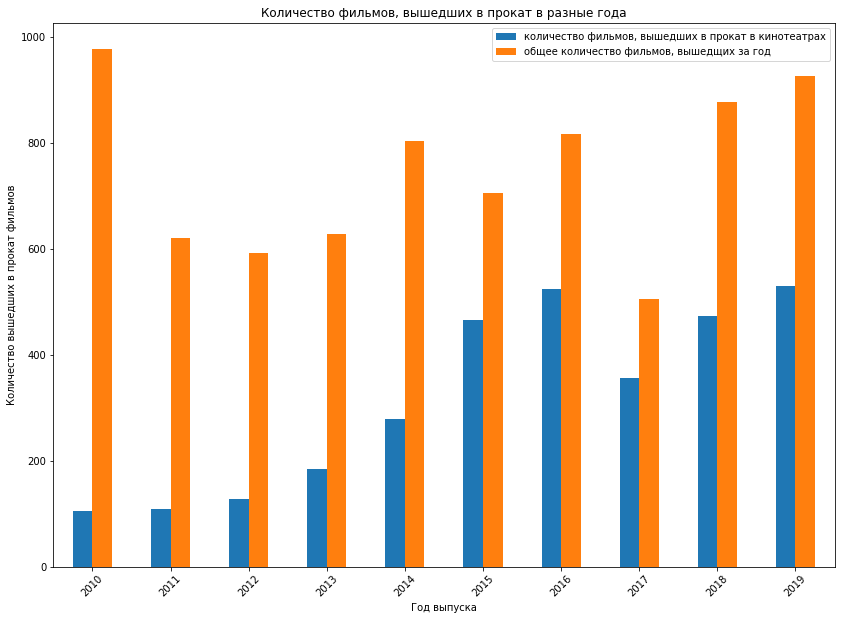

In [151]:
df_cinema.plot(y=['cinema_count', 'film_total'], kind='bar', figsize=(14,10), rot=45, label=[
    'количество фильмов, вышедших в прокат в кинотеатрах', 'общее количество фильмов, вышедщих за год'
]);
plt.title('Количество фильмов, вышедших в прокат в разные года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество вышедших в прокат фильмов');


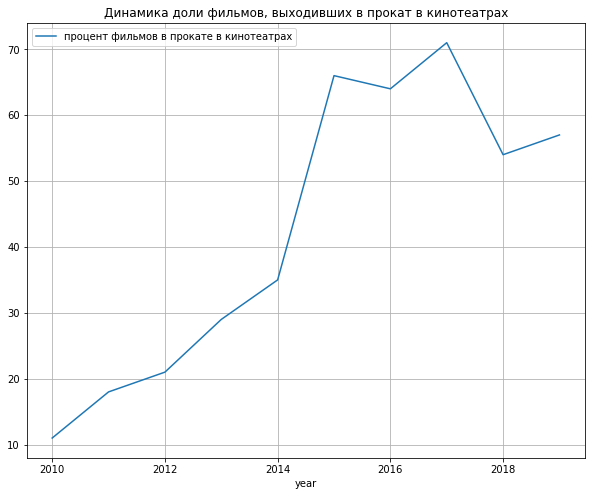

In [152]:
df_cinema.plot(y='cinema_%', figsize=(10, 8), label='процент фильмов в прокате в кинотеатрах', grid=True);
plt.title('Динамика доли фильмов, выходивших в прокат в кинотеатрах');

**Вывод:** доля фильмов, вышедших в прокат в кинотеартрах по сравнению с общем количеством выпущенных фильмов резко выросла за пять лет с 2010 по 2015 года. В 2010 году доля фильмов в прокате составляла 11%, а в 2015 - 66%. В 2017 году доля фильмов в прокате была максимальной и составила 71%, при этом для 2017 года характерно значительное сокращение количества выпущенных фильмов в целом: по сравнению с 2010 годом общее количество выпущенных фильмов упало почти в 2 раза - с 977 до 500. В 2018 году общее количество выпускаемых фильмов резко возросло с 505 до 878 в год, т.е на 57%, а доля фильмов в прокате упала до 54% в 2017 году  и немного возрасла 2019 году до 57%. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [153]:
sinema_sum = data.pivot_table(index='year', values='box_office', aggfunc='sum')
sinema_sum

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.911073e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786611e+10
2017,4.856371e+10
2018,4.966836e+10


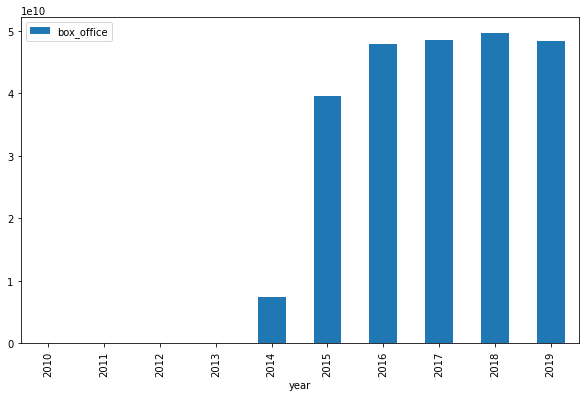

In [154]:
sinema_sum.plot(
    kind='bar', figsize=(10, 6), label='Сумма сборов по годам'
);

In [155]:
sinema_sum.sort_values(by='box_office', ascending=False)

,box_office
year,
2018,4.966836e+10
2017,4.856371e+10
2019,4.842571e+10
2016,4.786611e+10
2015,3.949737e+10
2014,7.444952e+09
2013,2.979971e+07
2011,1.410276e+07
2012,6.911073e+06


Минимальная сумма кассовых сборов приходится на 2010 год и составляет 2 428 654 руб. С 2010 по 2013 наблюдался очень медленный рост кассовых сборов, а также доли фильмов, выходивших в прокат в кинотеатре. Также, можно отметить, что по сравнению с 2010 годом в 2011-2013 годах общее количество выпущенных фильмов сократилось на 60%. С 2015 отмечен резкий скачок кассовых сборов, он составил 39 497 370 000 руб., что совпадает с резко возросшей долей фильмов, выпущенных в прокат в кинотеатрах, рост кассовых сборов наблюдался до 2018 года и в 2018 отмечена максимальная сумма кассовых сборов, составляющая 49 668 360 000 руб. В 2019 сумма кассовых сборов незначительно снизилась до 48 425 710 000 руб.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [156]:
sinema_stat = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
sinema_stat.columns = ['mean', 'median']
sinema_stat

,mean,median
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.441790e+04,5560.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.117353e+07,3915041.020
2017,1.360328e+08,9968340.000
2018,1.047856e+08,8911533.935


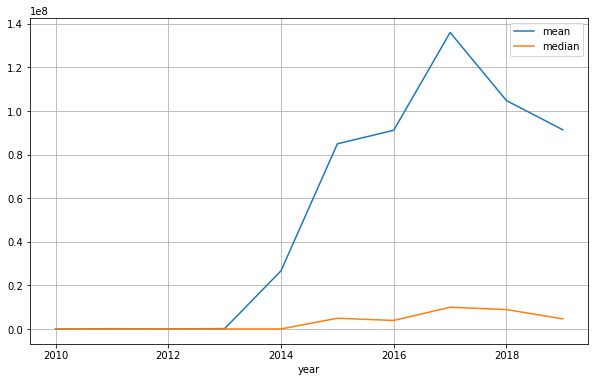

In [157]:
sinema_stat.plot(grid=True, figsize=(10,6));

Медиана намного ниже среднего по всем годам, отсюда можно сделать вывод, что в выборке присутствуют фильмы с большими сборами cо значительным отрывом от общих значений.
Средняя сумма сборов за 2010 год согласно данным составляет 23 130 руб. и выглядит странно. Посмотрим на фильмы за 2010 год, для которых известны кассовые сборы.

In [158]:
cinema_2010 = data.loc[(data['year'] == 2010)&(data['box_office'].isna()==False)]
len(cinema_2010)

105

In [159]:
cinema_2010['month'] = pd.DatetimeIndex(cinema_2010['show_start_date']).month
cinema_2010_stat = cinema_2010.pivot_table(index='month', values='box_office', aggfunc=['sum', 'mean', 'count'])
cinema_2010_stat.columns = ['sum', 'mean', 'count']
cinema_2010_stat

,sum,mean,count
month,,,
1,77417.0,8601.888889,9
2,20250.0,2531.250000,8
3,1355.0,451.666667,3
4,59886.0,5988.600000,10
5,64099.0,6409.900000,10
6,63122.0,6312.200000,10
7,192431.0,38486.200000,5
8,28293.0,3143.666667,9
9,1694885.0,564961.666667,3


В марте 2010 года было выпущено в прокат всего 3 фильма с общей суммой сборов всего 1355 руб, зато в сентябре было выпущено в прокат всего три фильма с общей суммой сборов 1 694 885 руб. Посмотрим на фильмы с суммой сбора менее 1000 руб за 2010 год и в целом за все года.

In [160]:
cinema_2010.loc[(cinema_2010['box_office'] < 1000)&(cinema_2010['box_office'] > 0)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part,month
3785,"Легион_.(Фильм содержит сцены ужасов, насилия ...",121000310,2010-01-25 12:00:00,Художественный,Болд Филмз,США,Скотт Стюарт,"Дэвид Ланкастер, Майкл Литвак",«18+» - запрещено для детей,NaN,...,NaN,NaN,прочие,560.0,18+,2010,Скотт Стюарт,прочие,NaN,1
3797,Золотое сечение,111000610,2010-01-26 12:00:00,Художественный,"ОАО ""ТПО ""Санкт-Петербургская студия документа...",Россия,С.Дебижев,"А.Тельнов, С.Федотов",«16+» - для детей старше 16 лет,NaN,...,NaN,4.9,приключения,760.0,6+,2010,С.Дебижев,приключения,NaN,1
3899,Неудержимые.,121013110,2010-08-02 12:00:00,Художественный,"Миллениум Филмз, Ню Имейдж Филмз, Рог Марбл",США,Сильвестр Сталлоне,"Кевин Кинг, Эви Лернер, Джон Томпсон, Кевин Ки...",«18+» - запрещено для детей,NaN,...,NaN,6.9,"боевик,приключения,триллер",350.0,18+,2010,Сильвестр Сталлоне,боевик,NaN,8
3900,"Больше, чем друг",121013210,2010-08-02 12:00:00,Художественный,"Бон Файд Прдакшнз, Мандат Пикчерз",США,"Джош Гордон, Уилл Спек","Алберт Бергер, Алан Лоб, Брэдли Томас",«16+» - для детей старше 16 лет,NaN,...,NaN,6.7,"драма,мелодрама,комедия",130.0,6+,2010,Джош Гордон,драма,NaN,8
3911,22 пули: Бессмертный,121006410,2010-04-01 12:00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,NaN,...,NaN,7.1,"боевик,драма,криминал",75.0,6+,2010,Ришар Бери,боевик,NaN,4
3915,Принц Персии: Пески времени,121007010,2010-05-25 12:00:00,Художественный,"Уолт Дисней Пикчерз, Джерри Брукхаймер Филмз",США,Майкл Ньюэлл,Джерри Брукхаймер,«12+» - для детей старше 12 лет,NaN,...,NaN,7.3,"фэнтези,боевик,приключения",895.0,12+,2010,Майкл Ньюэлл,фэнтези,NaN,5
4056,Ловец ветра,111009310,2010-10-21 12:00:00,Художественный,"ГУП РБ Киностудия ""Башкортостан""",Россия,А.Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,NaN,...,NaN,7.5,"драма,комедия",100.0,6+,2010,А.Юмагулов,драма,NaN,10
4118,Союз зверей /По книге Эрика Кастнера/,224022410,2010-11-18 12:00:00,Анимационный,"Эмбиент ИНтертейнмент, Константин Филм, Уайт Х...",Германия,"Рейнхард Клоос, Хольгер Таппе","Рейнхард Клоос, Мартин Московиц, Хольгер Таппе...",«0+» - для любой зрительской аудитории,NaN,...,NaN,5.6,"мультфильм,комедия,приключения",400.0,0+,2010,Рейнхард Клоос,мультфильм,NaN,11
4127,Дочь якудзы,111007710,2010-08-19 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ"" при участии ""Kinofabri...",Россия-Германия,"С.Бодров-старший, Г.Омарова","С.Сельянов, С.Бодров-старший",«16+» - для детей старше 16 лет,NaN,...,NaN,5.1,комедия,225.0,6+,2010,С.Бодров-старший,комедия,NaN,8
4157,Жизнь за гранью,121022210,2010-11-29 12:00:00,Художественный,"Харбор Лайт Интертейнмент, Леуджу Продакшнз, П...",США,Агнешка Войтович-Восло,"Брэд Майкл Гилберт, Билл Перкинс, Селин Рэттрэй",«16+» - для детей старше 16 лет,NaN,...,NaN,6.6,"триллер,драма,детектив",550.0,6+,2010,Агнешка Войтович-Восло,триллер,NaN,11


In [161]:
data.loc[(data['box_office'] < 1000)&(data['box_office'] > 0)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part
18,Неподдающиеся,111003616,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,8.0,"мелодрама,комедия",360.0,6+,2016,Ю.Чулюкин,мелодрама,NaN
19,Неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,7.7,драма,420.0,6+,2016,В.Краснопольский,драма,NaN
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0,6+,2013,Л.Гайдай,комедия,NaN
61,Американская дочь,111005515,2015-04-23 12:00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,unknown,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,7.0,"драма,комедия",300.0,6+,2015,К.Шахназаров,драма,NaN
75,Борис Годунов,111012213,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм"", ""Баррандов"" (ЧССР) при...","СССР, ЧССР, Западный Берлин, ПНР",С.Бондарчук,unknown,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,6.2,драма,420.0,6+,2013,С.Бондарчук,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Ариэтти из страны лилипутов,124001211,2011-08-05 12:00:00,Анимационный,"Буена Виста Хоум Интертейнмент, Студио Гибли, ...",Япония,Хиромаса Йонебаяши,"Тошио Сузуки, Соледад Гатти-Пасуаль, Фрэнк Мар...",«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,7.9,"аниме,мультфильм,фэнтези",450.0,6+,2011,Хиромаса Йонебаяши,аниме,NaN
5229,Другой мир: Пробуждение,121024511,2011-12-27 12:00:00,Художественный,"Скрин Гемс, Лэйкшор Интертейнмент, Сатурн Филм...",США,"Мэнс Мэрлинд, Бьорн Стейн","Лен Вайзмен, Гэри Луккези, Ричард С.Райт, Том ...",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.3,"ужасы,фэнтези,боевик",500.0,18+,2011,Мэнс Мэрлинд,ужасы,NaN
5285,Бой с тенью-3: последний раунд,111007211,2011-10-18 12:00:00,Художественный,"ООО ""Шаман пикчерс""",Россия,А.Сидоров,unknown,«16+» - для детей старше 16 лет,NaN,...,NaN,NaN,6.3,"боевик,драма,криминал",500.0,6+,2011,А.Сидоров,боевик,NaN
5331,Хранитель времени 3D,121023411,2011-12-15 12:00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,6.9,"драма,детектив,приключения",750.0,12+,2011,Мартин Скорсезе,драма,NaN


In [162]:
data.loc[(data['box_office'] < 1000)&(data['box_office'] > 0)].groupby(by='year')['title'].count()

year
2010    40
2011    30
2012    31
2013    46
2014    46
2015     5
2016     9
Name: title, dtype: int64

40 фильмов с суммой сбора менее 1000 руб за 2010 год и 207 фильмов с суммой сбора менее 1000 руб c 2010 по 2016 года. Очевидно,  данные для 2010-2014 годов должны быть интерпретированы в другой валюте, либо другим числовым разрядом. Поскольку корректность данных по кассовым сборам вызывает сомнения, можно с уверенностью делать выводы по кассовым сборам по итогам проката в кинотеатрах только для данных, начиная с 2015 года.  

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [163]:
cinema_age_category = data.query('year > 2014').pivot_table(
    index='year', values='box_office', columns='category_age_restriction', aggfunc=['sum', 'median', 'count']
)

cinema_age_category

sum                              \
category_age_restriction            0+           12+           18+   
year                                                                 
2015                      3.790546e+08  1.361608e+10  5.432308e+09   
2016                      1.500343e+08  1.220445e+10  6.793930e+09   
2017                      2.295989e+08  7.851428e+09  9.651496e+09   
2018                      3.244900e+07  1.426725e+10  8.760086e+09   
2019                      1.774607e+07  1.268020e+10  1.012180e+10   

                                             median                           \
category_age_restriction            6+           0+          12+         18+   
year                                                                           
2015                      2.006992e+10   2943318.70  15351562.50  4616614.70   
2016                      2.871769e+10   2687778.55   4690635.25  6107001.74   
2017                      3.083119e+10  22178956.00   9010548.00  8212677.00   
2018                      2.660858e+10   3616937.28  10035323.33  7179466.00   
2019                      2.560597e+10   3885434.50   3405545.76  5603216.55   

                                      count                
category_age_restriction           6+    0+ 12+  18+   6+  
year                                                       
2015                       7196756.00    39  73  132  221  
2016                       4240195.75    40  82  151  252  
2017                      12341672.50     3  41  147  166  
2018                      10487172.14     5  66  179  224  
2019                       4654563.09     3  85  183  259

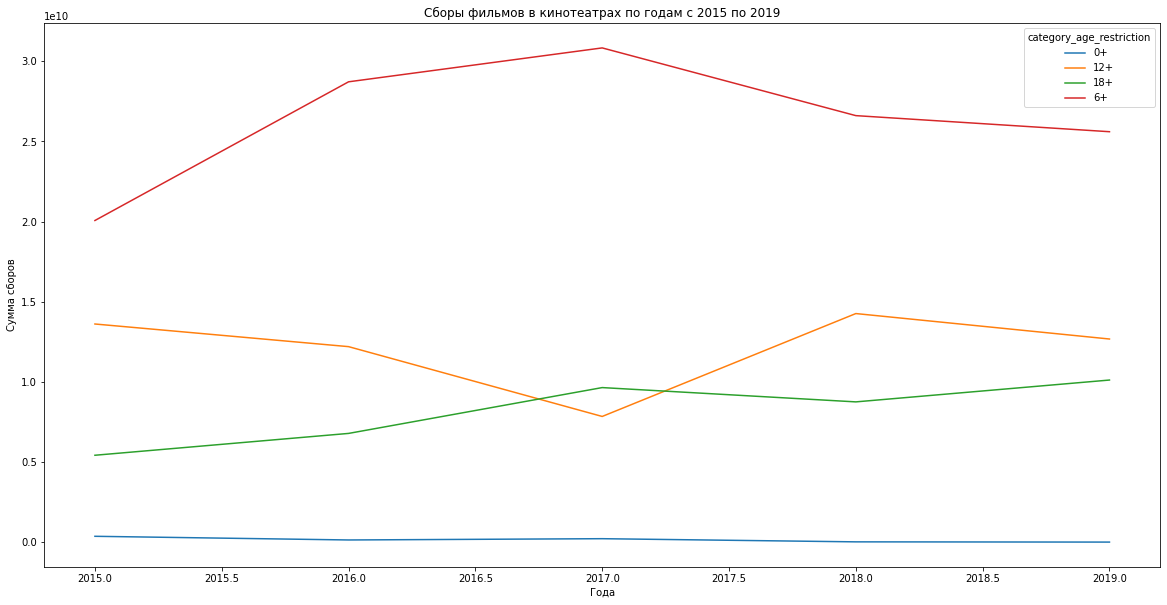

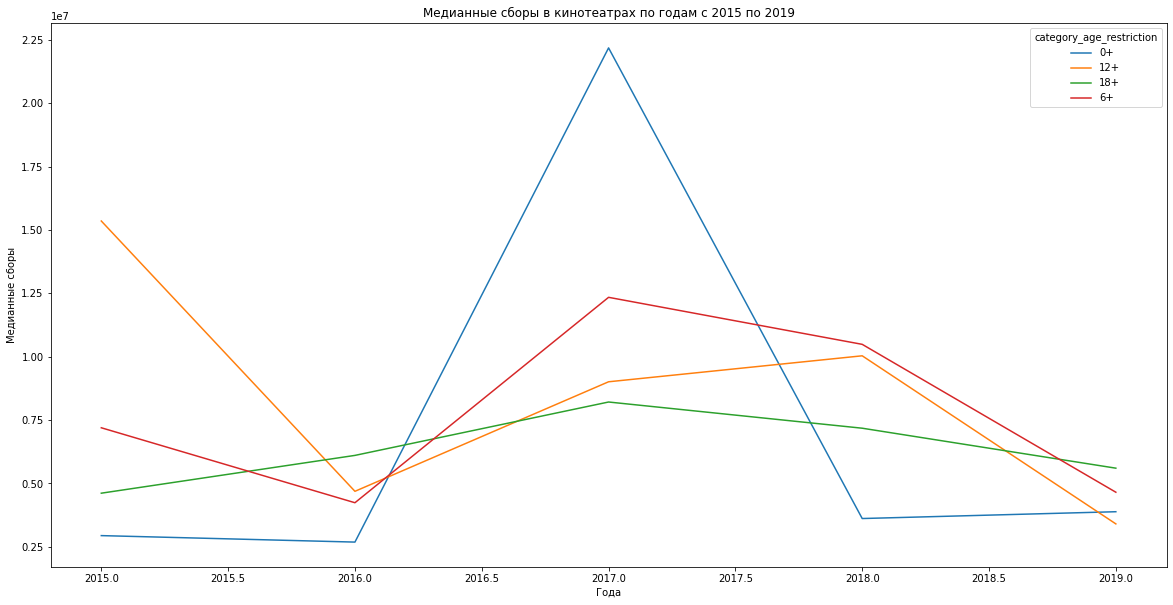

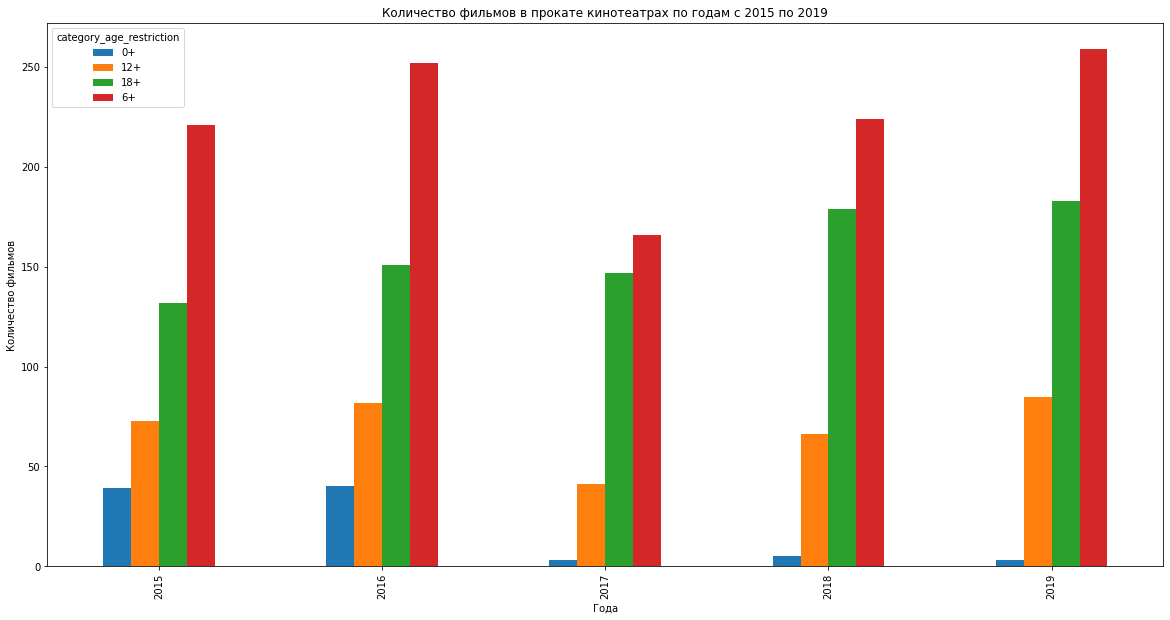

In [164]:
cinema_age_category.plot(y='sum', figsize=(20,10));
plt.title('Сборы фильмов в кинотеатрах по годам с 2015 по 2019')
plt.xlabel('Года')
plt.ylabel('Сумма сборов');
cinema_age_category.plot(y='median', figsize=(20,10));
plt.title('Медианные сборы в кинотеатрах по годам с 2015 по 2019')
plt.xlabel('Года')
plt.ylabel('Медианные сборы');
cinema_age_category.plot(y='count', kind='bar', figsize=(20,10));
plt.title('Количество фильмов в прокате кинотеатрах по годам с 2015 по 2019')
plt.xlabel('Года')
plt.ylabel('Количество фильмов');
plt.show()

**Вывод:** 

Доля фильмов, вышедших в прокат в кинотеартрах, по сравнению с общем количеством выпущенных фильмов резко выросла за пять лет с 2010 по 2015 года. В 2010 году доля фильмов в прокате составляла 11%, а в 2015 - 66%. В 2017 году доля фильмов в прокате была максимальной и составила 71%, при этом для 2017 года характерно значительное сокращение количества выпущенных фильмов в целом: по сравнению с 2010 годом общее количество выпущенных фильмов упало почти в 2 раза - с 977 до 500. В 2018 году общее количество выпускаемых фильмов резко возросло с 505 до 878 в год, т.е на 57%, а доля фильмов в прокате упала до 54% в 2017 году  и немного возрасла 2019 году до 57%. 

Минимальная сумма кассовых сборов приходится на 2010 год и составляет 2 428 654 руб. С 2010 по 2013 наблюдался очень медленный рост кассовых сборов, а также доли фильмов, выходивших в прокат в кинотеатре. Также, можно отметить, что по сравнению с 2010 годом в 2011-2013 годах общее количество выпущенных фильмов сократилось на 60%. С 2015 отмечен резкий скачок кассовых сборов, он составил 39 497 370 000 руб., что совпадает с резко возросшей долей фильмов, выпущенных в прокат в кинотеатрах, рост кассовых сборов наблюдался до 2018 года и в 2018 отмечена максимальная сумма кассовых сборов, составляющая 49 668 360 000 руб. В 2019 сумма кассовых сборов незначительно снизилась до 48 425 710 000 руб. 

Поскольку корректность данных по кассовым сборам вызывает сомнения, можно с уверенностью делать выводы по кассовым сборам по итогам проката в кинотеатрах только для данных, начиная с 2015 года.

Медиана намного ниже среднего по всем годам, отсюда можно сделать вывод, что в выборке присутствуют фильмы с большими сборами cо значительным отрывом от общих значений.


Максимальная сумма сборов с 2015 по 2019 гг. у фильмов для возрастной категории 6+ объясняется максимальным количеством выпущенных фильмов для данной возрастной категории в течение указанного периода. Минимальная сумма сборов у фильмов для возрастной категории 0+ объясняется минимальным количеством выпущенных фильмов в течении 2015-2019гг., при этом сумма сборов для возрастной категории 0+ стабильная и практически не меняется в течении 2015-2019 гг. 

Сумма сборов для возрастной категории 6+ меняется в зависимости от года: максимальная сумма сборов приходится на 2017 год и составляет 30 831 190 000 руб., при этом количество фильмов, выпущенных для данной категории в 2017 году существенно ниже, чем в в другие года: 166 фильмов в 2017 году, и 259 фильмов в 2019 году, но в 2019 году сумма сборов намного ниже и составила 25 605 970 000 руб.

Сумма сборов для возрастной категории 12+ также меняется по годам: с 2015 по 2016 года наблюдается незначительное снижение кассовых сборов фильмов с 13 616 080 000 до 12 204 450 000 руб., в 2017 году наблюдается резкий провал на 37% по суммам сборов, которые составили 7 851 428 000, по сравнению с 2016 годом; для возрастной категории 12+ в 2018 году кассовые сборы выросли в 2 раза по сравнению с 2017 годом, характерно выражен пик кассовых сборов по сравнению с другими годами в исследуемом периоде, который составил 14 267 250 000 руб.

Для фильмов возрастной категории 18+ кассовые сборы с 2015 по 2019гг. росли стабилььно и выросли почти в два раза с 5 432 308 000 по 10 121 800 000 руб.

Картина по медианным сбором немного отличается от общей суммы сборов по годам. 

Для фильмов с возрастной категории 0+ медианные сборы по годам сохраняются минимальными, по сравнению с другими возрастными категориями на протяжении всего периода, с резким скачком в 2017 году, где сумма медианных сборов максимальная среди всех остальных возрастных категорий и составила 22 178 956 руб.

Для фильмов с возрастной категорией 18+ медианные сборы с 2015 по 2017 года выросли почти в два раза, где в 2015 медианные сборы составили 4 616 614 руб., а 2017 наблюдался пик 8 212 677 руб., затем медианные сборы снизились к в 2019 году к отметке в 5 603 216 руб.

Для фильмов с возрастной категории 6+ медианные сборы в течение исследуемого периода менялись, пик пришелся на 2017 год, где медианные сборы оказались на втором месте по сравнению с медианными сборами для фильмов с возрастной категорией 0+, и составили 12 341 672 руб (в два раза меньше, чем для фильмов с возрастной категорией 0+). К 2019 году сумма медианных сборов снизилась к отметке 2016 года и составила 4 654 563 руб.

Для фильмов с возрастной категорией 12+ пик медианных сборов пришелся на 2015 год и составил 15 351 562 руб., а к 2016 году медианные сборы упали в три раза до 4 690 635 руб., затем в течение двух лет до 2018 наблюдался постепенный рост медианных сборов до 10 035 323 руб., а к 2019 году медианные сборы для указанной возрастной категории упали к минимуму и составили 3 405 545 руб.
В целом, для всех возрастных категорий 2019 год характерен снижением медианных сборов к отметке 2016 года.

### 4. Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [165]:
#Посмотрим, сколько выделяют средств на поддержку кино

In [166]:
data['total_support'] = data[['refundable_support', 'nonrefundable_support']].sum(axis=1)

In [167]:
data['total_support'].sum()

20200688312.0

 Общий объем средств на поддержку кино с 2010 по 2019 гг. составил 20 200 688 312 руб.

In [168]:
#Посмотрим общий объем выделенных средств по годами

In [169]:
data.groupby('year')['total_support'].sum()

year
2010    0.000000e+00
2011    0.000000e+00
2012    0.000000e+00
2013    1.343479e+08
2014    5.720023e+08
2015    3.656241e+09
2016    4.303155e+09
2017    3.183972e+09
2018    3.446969e+09
2019    4.904000e+09
Name: total_support, dtype: float64

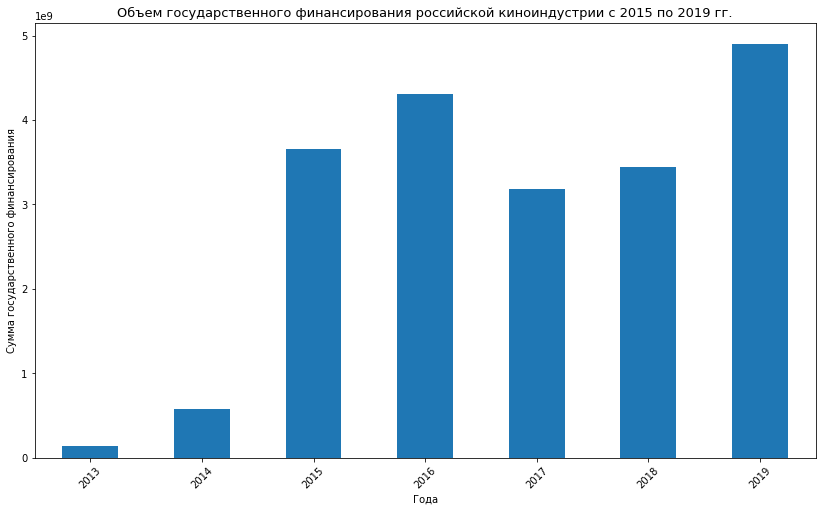

In [170]:
data.query('year>2012').groupby('year')['total_support'].sum().plot(kind='bar', rot=45, figsize=(14,8));
plt.title(
    'Объем государственного финансирования российской киноиндустрии с 2015 по 2019 гг.', 
    fontsize = 13,  
    bbox = {'pad': 0.8,
            'facecolor': 'white',
           'linewidth':0}
           
)
plt.xlabel('Года')
plt.ylabel('Сумма государственного финансирования');

Для 2010-2012 гг. нет данных о поддержке государства. Госфинансирование началось с 2013 года. C 2014 по 2015гг объем господдержки российской киноиндустрии вырос в 7 раз. Максимальный объем выделенных средств пришелся на 2019 год и составил 4 904 000 000 руб. В 2017 и 2018 гг выражено незначительное снижение государственной поддержки.

In [171]:
#Посмотрим на среднее арифметической выделенных средств на поддержку выпускаемых фильмов по годам

In [172]:
data.groupby('year')['total_support'].mean()

year
2010    0.000000e+00
2011    0.000000e+00
2012    0.000000e+00
2013    2.139298e+05
2014    7.114456e+05
2015    5.186158e+06
2016    5.267020e+06
2017    6.304894e+06
2018    3.925933e+06
2019    5.295896e+06
Name: total_support, dtype: float64

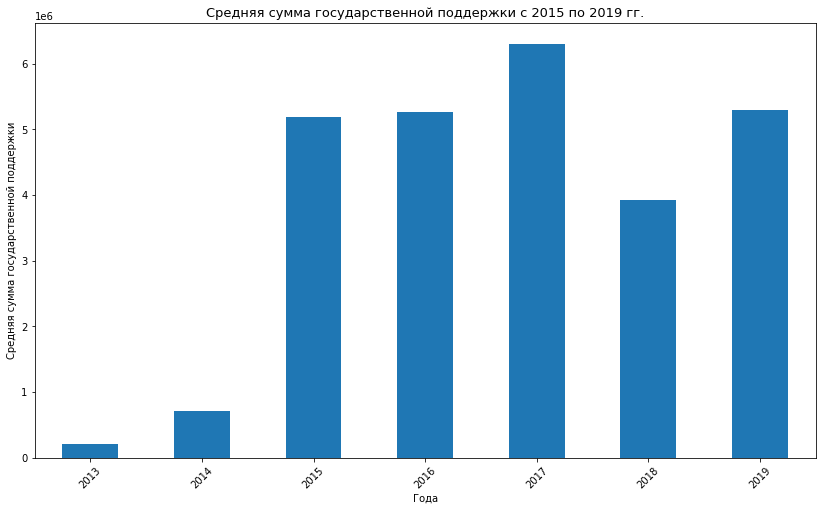

In [173]:
data.query('year > 2012').groupby('year')['total_support'].mean().plot(kind='bar',  rot=45, figsize=(14,8));
plt.title(
    'Средняя сумма государственной поддержки с 2015 по 2019 гг.', 
    fontsize = 13,  
    bbox = {'pad': 0.8,
            'facecolor': 'white',
           'linewidth':0}
           
)
plt.xlabel('Года')
plt.ylabel('Средняя сумма государственной поддержки');

In [174]:
#Посчитаем среднюю сумму выделяемых средств 

In [175]:
print(data['total_support'].mean())

2710774.0622651638


Средняя сумма выделяемых государством денежных средств на фильм составила 2 710 774 руб.

In [176]:
#Проверим, хорошо ли окупаются фильмы с господдержкой и какой у них рейтинг

In [177]:
#Отфильтруем фильмы с господдержкой и сохраним их в переменную

In [178]:
films_with_state_support = data.loc[data['budget'] > 0]
films_with_state_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part,total_support
1280,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,6+,2013,А.Атанесян,драма,0.3,26500000.0
1446,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,прочие,2.814000e+04,12+,2014,А.Якимчук,прочие,0.7,26000000.0
1496,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,12+,2013,Р.Давлетьяров,комедия,0.6,107847945.0
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,5.591750e+04,6+,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7,28000000.0
1789,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,2.321000e+05,6+,2014,М.Угаров,драма,0.6,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,6.0,"история,биография,драма",7.177032e+08,12+,2019,А.Кравчук,история,0.5,500000000.0
7438,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,6+,2019,Д.Шмидт,мультфильм,0.5,100000000.0
7446,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,12+,2019,Ф.Бондарчук,фантастика,0.5,500000000.0
7448,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,драма,NaN,12+,2019,И.Северов,драма,0.6,30000000.0


Чтобы посчитать, окупились ли фильмы с господдержкой, будем исходить из логики, что фильм окупается, когда кассовые сборы в два с половиной раза превышают бюджет фильма, поскольку кинотеатры забирают половину от суммы сборов, а также необходимо заложить средства на рекламу фильма.

In [179]:
#Отфильтруем фильмы с господдержкой, которые окупились

In [180]:
profit_movies = films_with_state_support[films_with_state_support['box_office']>(films_with_state_support['budget']*2.5)]
profit_movies

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part,total_support
1899,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.0,"триллер,боевик,приключения",3.528043e+08,6+,2015,А.Войтинский,триллер,0.5,75000000.0
2054,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,6.6,драма,4.461635e+08,6+,2015,Р.Прыгунов,драма,1.0,75000000.0
2128,Битва за Севастополь,111001415,2015-02-20 12:00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,7.5,"биография,военный,драма",4.018045e+08,12+,2015,С.Мокрицкий,биография,0.2,27510000.0
2201,8 новых свиданий,111014914,2014-10-30 12:00:00,Художественный,"ООО ""Смарт ТВ Продакшн""",Россия,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад""",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,6.0,комедия,3.933446e+08,12+,2014,М.Бальчюнас,комедия,0.4,30000000.0
2528,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,...,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,6+,2015,Д.Штурманова,комедия,1.0,20000000.0
2697,Самый Лучший День,111017815,2015-10-14 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,29000000.0,...,Фонд кино,4.7,"комедия,музыка",6.830291e+08,6+,2015,А.Першин (псевдоним Ж.Крыжовников),комедия,0.5,63000000.0
2763,Страна чудес,111018415,2015-10-16 12:00:00,Художественный,"ООО ""Ол Медиа Компани""",Россия,Д.Дьяченко,"Г.Шабанов, Р.Татаринцев, Э.Илоян",«12+» - для детей старше 12 лет,41000000.0,...,Фонд кино,6.0,"ужасы,комедия",2.945908e+08,12+,2015,Д.Дьяченко,ужасы,0.6,66000000.0
2854,28 Панфиловцев,111000916,2016-01-27 12:00:00,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,7.5,"военный,драма,история",3.636228e+08,12+,2016,К.Дружинин,военный,0.4,30000000.0
2870,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,4.3,комедия,1.536293e+07,12+,2016,В.Ровенский,комедия,1.0,6000000.0
3101,Иван Царевич и Серый Волк 3,114004115,2015-12-24 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,6.2,"мультфильм,приключения,семейный",7.049282e+08,6+,2015,Д.Шмидт,мультфильм,0.2,40000000.0


In [181]:
#Посчитаем долю фильмов, которые окупились

In [182]:
profit_movies.shape[0]/films_with_state_support.shape[0]

0.09036144578313253

Доля окупаемых фильмов, получивших государственную поддержку составила всего 9%

In [183]:
#Найдем ТОП-10 наиболее окупаемых фильмов с государственной поддержкой

In [184]:
profit_movies.sort_values(by='box_office').head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part,total_support
2870,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,4.3,комедия,1.536293e+07,12+,2016,В.Ровенский,комедия,1.0,6000000.0
2528,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,...,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,6+,2015,Д.Штурманова,комедия,1.0,20000000.0
6963,Давай разведемся!,111009519,2019-06-12 12:00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Пармас,"С.Сельянов, К.Эрнст, Н.Дрозд-Макан",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,комедия,1.030983e+08,12+,2019,А.Пармас,комедия,0.7,25000000.0
3225,Невеста .,111016516,2016-10-25 12:00:00,Художественный,"ООО ""Форс Медиа""",Россия,С.Подгаевский,"В.Северцев, Д.Литвинов, З.Болотаев",«16+» - для детей старше 16 лет,5000000.0,...,Фонд кино,4.7,"ужасы,триллер",1.757996e+08,6+,2016,С.Подгаевский,ужасы,0.5,25000000.0
6761,Трезвый водитель,111004519,2019-03-21 12:00:00,Художественный,"ООО ""Кинокомпания ""Небо"" по заказу АО ""ВБД Груп""",Россия,Р.Гигинеишвили,"Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, Р.Ги...",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,5.1,"комедия,приключения",2.148717e+08,6+,2019,Р.Гигинеишвили,комедия,0.5,40000000.0
5661,Селфи,111012117,2018-02-01 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,20000000.0,...,Фонд кино,5.8,"триллер,драма",2.251964e+08,6+,2018,Н.Хомерики,триллер,1.0,60000000.0
3224,"Гуляй, Вася !",111018216,2016-12-20 12:00:00,Художественный,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",Россия,Р.Каримов,"А.Новиков, А.Котелевский, Э.Илоян, Д.Жалинский...",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.5,комедия,2.590991e+08,6+,2016,Р.Каримов,комедия,0.6,25345000.0
2763,Страна чудес,111018415,2015-10-16 12:00:00,Художественный,"ООО ""Ол Медиа Компани""",Россия,Д.Дьяченко,"Г.Шабанов, Р.Татаринцев, Э.Илоян",«12+» - для детей старше 12 лет,41000000.0,...,Фонд кино,6.0,"ужасы,комедия",2.945908e+08,12+,2015,Д.Дьяченко,ужасы,0.6,66000000.0
1899,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.0,"триллер,боевик,приключения",3.528043e+08,6+,2015,А.Войтинский,триллер,0.5,75000000.0
2854,28 Панфиловцев,111000916,2016-01-27 12:00:00,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,7.5,"военный,драма,история",3.636228e+08,12+,2016,К.Дружинин,военный,0.4,30000000.0


In [185]:
#Посмотрим какой рейтинг у наиболее окупаемых фильмов

In [186]:
profit_movies['ratings'].value_counts()

7.5    3
6.5    3
6.7    3
6.2    2
6.8    2
4.7    2
5.8    2
6.9    2
6.0    2
4.3    1
5.1    1
6.6    1
7.0    1
5.9    1
5.3    1
5.5    1
5.6    1
Name: ratings, dtype: int64

In [187]:
profit_movies['ratings'].mean()

6.213793103448277

Средний рейтинг у окупаемых фильмов с государственной поддержкой составил 6.21, но встречаются фильмы с рейтингом 7.5. Минимальный рейтинг у окупаемых фильмов с государственной поддержкой 5.6

In [188]:
#Посмотрим на средний рейтинг всех фильмов с государственной поддержкой

In [189]:
films_with_state_support['ratings'].mean()

6.020886075949368

Средний рейтинг общего количества фильмов с государственной поддержкой составил 6.02, немного ниже, чем у окупаемых фильмов, но незначительно.

In [190]:
#Найдем наиболее окупаемые жанры среди фильмов с господдержкой

In [191]:
profit_movies['genre_main'].value_counts()

комедия       14
мультфильм     4
драма          3
триллер        2
ужасы          2
военный        1
прочие         1
фантастика     1
спорт          1
биография      1
Name: genre_main, dtype: int64

К наиболее окупаемым жанрам относятся такие жанры, как комедия и мультфильмы

In [192]:
#Посмотрим, какую долю поддержки от бюджета выделило государство среди окупившихся фильмов и неокупившихся

In [193]:
films_loss = films_with_state_support[films_with_state_support['box_office']<(films_with_state_support['budget']*2.5)]
films_loss

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,category_age_restriction,year,director_name,genre_main,state_support_part,total_support
1280,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,6+,2013,А.Атанесян,драма,0.3,26500000.0
1446,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,прочие,2.814000e+04,12+,2014,А.Якимчук,прочие,0.7,26000000.0
1496,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,12+,2013,Р.Давлетьяров,комедия,0.6,107847945.0
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,5.591750e+04,6+,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7,28000000.0
1789,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,2.321000e+05,6+,2014,М.Угаров,драма,0.6,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,Успех,111018519,2019-11-04 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,...,Фонд кино,7.8,драма,3.181218e+06,12+,2019,П.Руминов,драма,0.3,25000000.0
7302,Лев Яшин. Вратарь моей мечты,111018719,2019-11-21 12:00:00,Художественный,"ООО ""Кремлин Филмз""",Россия,В.Чигинский,О.Капанец,«6+» - для детей старше 6 лет,0.0,...,Министерство культуры,6.9,"биография,спорт,драма",1.140902e+08,6+,2019,В.Чигинский,биография,0.2,60000000.0
7347,Тварь,111019419,2019-11-26 12:00:00,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",«16+» - для детей старше 16 лет,5000000.0,...,Фонд кино,5.0,"триллер,драма",1.861716e+07,6+,2019,О.Городецкая,триллер,0.5,40000000.0
7425,Фиксики против кработов,114004819,2019-12-21 12:00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,80000000.0,...,Фонд кино,7.5,"мультфильм,детский,приключения",3.875905e+08,6+,2019,В.Бедошвили,мультфильм,0.4,120000000.0


In [194]:
films_loss['state_support_part'].value_counts()

0.7    83
0.6    70
0.5    34
0.3    33
0.4    30
0.2    16
1.0    12
0.1     8
0.0     1
0.8     1
Name: state_support_part, dtype: int64

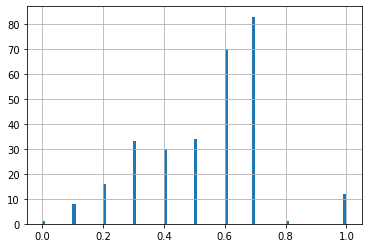

In [195]:
films_loss['state_support_part'].hist(bins=100);

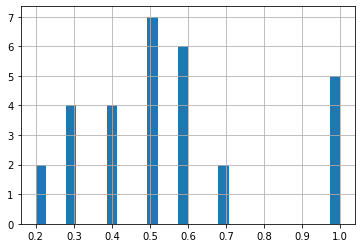

In [196]:
profit_movies['state_support_part'].hist(bins=30);

Среди фильмов, неокупившихся фильмов доля государственной поддержки составляла 60-70%, в то же время, среди окупившихся фильмов наиболее частая доля государственной поддержки составила 50% - 60%, а также 100%.

**Вывод:**

Ввиду отсутствия данных о государственном финансировании за 2010-2012гг, исследуемый период госфинансирования фильмов с 2013 года. C 2014 по 2015гг объем господдержки российской киноиндустрии вырос в 7 раз. Максимальный объем выделенных средств пришелся на 2019 год и составил 4 904 000 000 руб. В 2017 и 2018 гг выражено незначительное снижение государственной поддержки.

 Общий объем средств на поддержку кино с 2010 по 2019 гг. составил 20 200 688 312 руб.
 
 Средняя сумма выделяемых государством денежных средств на фильм составила 2 710 774 руб.
 
 Чтобы посчитать, окупились ли фильмы с господдержкой, будем исходить из логики, что фильм окупается в случае, если кассовые сборы в два с половиной раза превышают бюджет фильма, поскольку кинотеатры забирают половину от суммы сборов, а также необходимо заложить средства на рекламу фильма.
 
 Доля окупаемых фильмов, получивших государственную поддержку составила всего 9%
 
 Средний рейтинг у окупаемых фильмов с государственной поддержкой составил 6.21, но встречаются фильмы с рейтингом 7.5. Минимальный рейтинг у окупаемых фильмов с государственной поддержкой 5.6
 
 Средний рейтинг общего количества фильмов с государственной поддержкой составил 6.02, немного ниже, чем у окупаемых фильмов, но незначительно.
 
 К наиболее окупаемым жанрам относятся такие жанры, как комедия и мультфильмы.
 
 Среди неокупившихся фильмов доля государственной поддержки составляла 60-70%, в то же время, среди окупившихся фильмов наиболее частая доля государственной поддержки составила 50% - 60%, а также 100% присутствуют фильмы, где доля вложения государства составила 100%.

### 5. Общий вывод

**Цель исследования:**

1. Изучить рынок российского кинопроката и выявить текущие тренды.
2. Выяснить, насколько фильмы, получившие государственную поддержку интересны зрителю.

**Ход исследования:**



Исследовательский анализ данных.
Исследование фильмов, получивших государственную поддержку.
Общий вывод.

 **1. Обзор данных.**
 
В ходе ознакомления с данными установлено, что в таблице data содержится 7486 строк и 15 столбцов. Некоторые столбцы содержат пропуски. Название столбца `puNumber` приведено к общепринятому стилю snake_case, тип данных в указанном столбце изменен на `int`. К таблице `data` была присоединена таблица `data.show` по столбцу `puNumber`, содержащего номер прокатного удостоверения. 

**2. Предобработка данных.**


В результате проведенной предобработки данных:
 

 - тип данных столбца `show_start_date` к приведен к типу данных `datetime`. В столбце `ratings` исправлены опечатки, тип данных приведен к `float`.
 
 -  Изучены и обработаны пропуски в столбцах таблицы.
 -  Обнаружены и удалены дубликаты. 

 - изучены столбцы с категориальными данными, исправлены опечатки в виде пробелов в начале и в конце значений. Создан столбец category_age_restriction, где для удобства восприятия указаны сокращенные данные возрастной классификации. В ячейках столбцов type, film_studio, production_country, genres перечисленно несколько вариантов категориальных значений, что в дальнейшем затрудняет проведение сравнительного и статистического анализа этих столбцов.
 - Выявлено 17 фильмов с государственной поддержкой, для которых не указан бюджет фильма. Нулевые значения для таких строк заполнены суммой возвратных и невозвратных средств.
 - Добавлен столбец с информацией о годе проката. Добавлены столбцы с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно. Добавлен столбец и посчитана доля государственной поддержки от общего бюджета фильма, которую найдена как сумма возвратных и невозвратных средств разделеная на сумму общего бюджета фильма.
 
 
**3. Исследовательский анализ данных.**

Доля фильмов, вышедших в прокат в кинотеартрах, по сравнению с общем количеством выпущенных фильмов резко выросла за пять лет с 2010 по 2015 года. В 2010 году доля фильмов в прокате составляла 11%, а в 2015 - 66%. В 2017 году доля фильмов в прокате была максимальной и составила 71%, при этом для 2017 года характерно значительное сокращение количества выпущенных фильмов в целом: по сравнению с 2010 годом общее количество выпущенных фильмов упало почти в 2 раза - с 977 до 500. В 2018 году общее количество выпускаемых фильмов резко возросло с 505 до 878 в год, т.е на 57%, а доля фильмов в прокате упала до 54% в 2017 году  и немного возрасла 2019 году до 57%. 

Минимальная сумма кассовых сборов приходится на 2010 год и составляет 2 428 654 руб. С 2010 по 2013 наблюдался очень медленный рост кассовых сборов, а также доли фильмов, выходивших в прокат в кинотеатре. Также, можно отметить, что по сравнению с 2010 годом в 2011-2013 годах общее количество выпущенных фильмов сократилось на 60%. С 2015 отмечен резкий скачок кассовых сборов, он составил 39 497 370 000 руб., что совпадает с резко возросшей долей фильмов, выпущенных в прокат в кинотеатрах, рост кассовых сборов наблюдался до 2018 года и в 2018 отмечена максимальная сумма кассовых сборов, составляющая 49 668 360 000 руб. В 2019 сумма кассовых сборов незначительно снизилась до 48 425 710 000 руб. 

Поскольку корректность данных по кассовым сборам вызывает сомнения, можно с уверенностью делать выводы по кассовым сборам по итогам проката в кинотеатрах только для данных, начиная с 2015 года.

Медиана намного ниже среднего по всем годам, отсюда можно сделать вывод, что в выборке присутствуют фильмы с большими сборами cо значительным отрывом от общих значений.


Максимальная сумма сборов с 2015 по 2019 гг. у фильмов для возрастной категории 6+ объясняется максимальным количеством выпущенных фильмов для данной возрастной категории в течение указанного периода. Минимальная сумма сборов у фильмов для возрастной категории 0+ объясняется минимальным количеством выпущенных фильмов в течении 2015-2019гг., при этом сумма сборов для возрастной категории 0+ стабильная и практически не меняется в течении 2015-2019 гг. 

Сумма сборов для возрастной категории 6+ меняется в зависимости от года: максимальная сумма сборов приходится на 2017 год и составляет 30 831 190 000 руб., при этом количество фильмов, выпущенных для данной категории в 2017 году существенно ниже, чем в в другие года: 166 фильмов в 2017 году, и 259 фильмов в 2019 году, но в 2019 году сумма сборов намного ниже и составила 25 605 970 000 руб.

Сумма сборов для возрастной категории 12+ также меняется по годам: с 2015 по 2016 года наблюдается незначительное снижение кассовых сборов фильмов с 13 616 080 000 до 12 204 450 000 руб., в 2017 году наблюдается резкий провал на 37% по суммам сборов, которые составили 7 851 428 000, по сравнению с 2016 годом; для возрастной категории 12+ в 2018 году кассовые сборы выросли в 2 раза по сравнению с 2017 годом, характерно выражен пик кассовых сборов по сравнению с другими годами в исследуемом периоде, который составил 14 267 250 000 руб.

Для фильмов возрастной категории 18+ кассовые сборы с 2015 по 2019гг. росли стабилььно и выросли почти в два раза с 5 432 308 000 по 10 121 800 000 руб.

Картина по медианным сбором немного отличается от общей суммы сборов по годам. 

Для фильмов с возрастной категории 0+ медианные сборы по годам сохраняются минимальными, по сравнению с другими возрастными категориями на протяжении всего периода, с резким скачком в 2017 году, где сумма медианных сборов максимальная среди всех остальных возрастных категорий и составила 22 178 956 руб.

Для фильмов с возрастной категорией 18+ медианные сборы с 2015 по 2017 года выросли почти в два раза, где в 2015 медианные сборы составили 4 616 614 руб., а 2017 наблюдался пик 8 212 677 руб., затем медианные сборы снизились к в 2019 году к отметке в 5 603 216 руб.

Для фильмов с возрастной категории 6+ медианные сборы в течение исследуемого периода менялись, пик пришелся на 2017 год, где медианные сборы оказались на втором месте по сравнению с медианными сборами для фильмов с возрастной категорией 0+, и составили 12 341 672 руб (в два раза меньше, чем для фильмов с возрастной категорией 0+). К 2019 году сумма медианных сборов снизилась к отметке 2016 года и составила 4 654 563 руб.

Для фильмов с возрастной категорией 12+ пик медианных сборов пришелся на 2015 год и составил 15 351 562 руб., а к 2016 году медианные сборы упали в три раза до 4 690 635 руб., затем в течение двух лет до 2018 наблюдался постепенный рост медианных сборов до 10 035 323 руб., а к 2019 году медианные сборы для указанной возрастной категории упали к минимуму и составили 3 405 545 руб.
В целом, для всех возрастных категорий 2019 год характерен снижением медианных сборов к отметке 2016 года.

**4. Исследование фильмов, получивших государственную поддержку.**

Ввиду отсутствия данных о государственном финансировании за 2010-2012гг, исследуемый период госфинансирования фильмов с 2013 года. C 2014 по 2015гг объем господдержки российской киноиндустрии вырос в 7 раз. Максимальный объем выделенных средств пришелся на 2019 год и составил 4 904 000 000 руб. В 2017 и 2018 гг выражено незначительное снижение государственной поддержки.

 Общий объем средств на поддержку кино с 2010 по 2019 гг. составил 20 200 688 312 руб.
 
 Средняя сумма выделяемых государством денежных средств на фильм составила 2 710 774 руб.
 
 Чтобы посчитать, окупились ли фильмы с господдержкой, будем исходить из логики, что фильм окупается в случае, если кассовые сборы в два с половиной раза превышают бюджет фильма, поскольку кинотеатры забирают половину от суммы сборов, а также необходимо заложить средства на рекламу фильма.
 
 Доля окупаемых фильмов, получивших государственную поддержку составила всего 9%
 
 Средний рейтинг у окупаемых фильмов с государственной поддержкой составил 6.21, но встречаются фильмы с рейтингом 7.5. Минимальный рейтинг у окупаемых фильмов с государственной поддержкой 5.6
 
 Средний рейтинг общего количества фильмов с государственной поддержкой составил 6.02, немного ниже, чем у окупаемых фильмов, но незначительно.
 
 К наиболее окупаемым жанрам относятся такие жанры, как комедия и мультфильмы.
 
 Среди неокупившихся фильмов доля государственной поддержки составляла 60-70%, в то же время, среди окупившихся фильмов наиболее частая доля государственной поддержки составила 50% - 60%, а также присутствуют фильмы, где доля вложения государства составила 100%.